***DATA VISUALISATION ON NETFLIX DATA***


In [47]:
!pip install pandas


[notice] A new release of pip is available: 24.0 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [48]:
import matplotlib.pyplot as plt
import pandas as pd


In [49]:
df=pd.read_csv('netflix_titles.csv')
print(df.head())

  show_id     type                  title         director  \
0      s1    Movie   Dick Johnson Is Dead  Kirsten Johnson   
1      s2  TV Show          Blood & Water              NaN   
2      s3  TV Show              Ganglands  Julien Leclercq   
3      s4  TV Show  Jailbirds New Orleans              NaN   
4      s5  TV Show           Kota Factory              NaN   

                                                cast        country  \
0                                                NaN  United States   
1  Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...   South Africa   
2  Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...            NaN   
3                                                NaN            NaN   
4  Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...          India   

           date_added  release_year rating   duration  \
0  September 25, 2021          2020  PG-13     90 min   
1  September 24, 2021          2021  TV-MA  2 Seasons   
2  September 24, 2021        

In [50]:
df.shape

(8807, 12)

In [51]:
#cleaning
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [52]:
df=df.dropna(subset=['type','title','director','cast','country','date_added','release_year','rating','duration','listed_in','description'])

***Question  ***                                          Chart Type          Matplotlib Function


How many Movies vs TV Shows?                    |    Bar Chart       |    plt.bar()
What is the percentage of each content rating?  |    Pie Chart       |    plt.pie()
(PG, R, TV-MA)?                                 |                    |
How has the number of releases changed          |    Line Plot       |    plt.plot()
over the years?                                 |                    |
What is the distribution of movie durations?    |    Histogram       |    plt.hist()
Relationship between release year and           |    Scatter Plot    |    plt.scatter()
number of shows?                                |    (optional)      |
Top 10 countries with the highest number of     |    Bar Chart       |    plt.barh()
shows?                                          |    (Horizontal)    |
Compare multiple plots together (e.g.,          |    Subplots        |    plt.subplot() 
Movies vs TV Shows by Year)                     |                    |    plt.subplots()
Save final charts                               |    Saving Figures  |    plt.savefig()

In [59]:
print(df['type'])

7         Movie
8       TV Show
9         Movie
12        Movie
24        Movie
         ...   
8801      Movie
8802      Movie
8804      Movie
8805      Movie
8806      Movie
Name: type, Length: 5332, dtype: object


In [57]:

type_cnt=df['type'].value_counts()
print(type_cnt.values)
print(type_cnt.index)

[5185  147]
Index(['Movie', 'TV Show'], dtype='object', name='type')


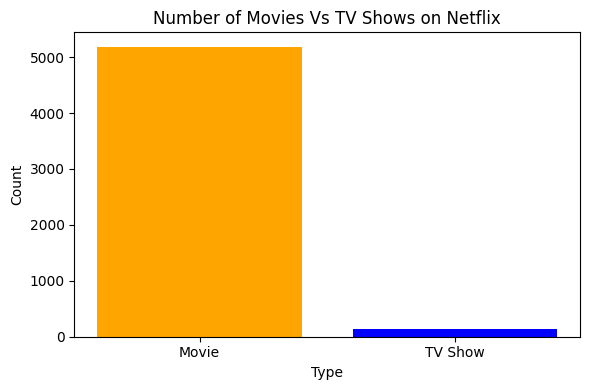

In [58]:
#CREATING BAR question 1
plt.figure(figsize=(6,4))
plt.bar(type_cnt.index,type_cnt.values,color=['orange','blue'])
plt.title("Number of Movies Vs TV Shows on Netflix")
plt.xlabel("Type")
plt.ylabel("Count")
plt.tight_layout()
plt.savefig("movies_vs_tvshows.png")
plt.show()

2. What is the percentage of each content rating?  |    Pie Chart       |    plt.pie()
   (PG, R, TV-MA)?                                 

In [60]:
rating =df['rating']
print(rating)

7       TV-MA
8       TV-14
9       PG-13
12      TV-MA
24      TV-14
        ...  
8801    TV-MA
8802        R
8804        R
8805       PG
8806    TV-14
Name: rating, Length: 5332, dtype: object


In [70]:
rating_cnt=df['rating'].value_counts()[['PG','TV-MA','R']]
print(rating_cnt)
print(rating_cnt.index)


rating
PG        275
TV-MA    1822
R         778
Name: count, dtype: int64
Index(['PG', 'TV-MA', 'R'], dtype='object', name='rating')


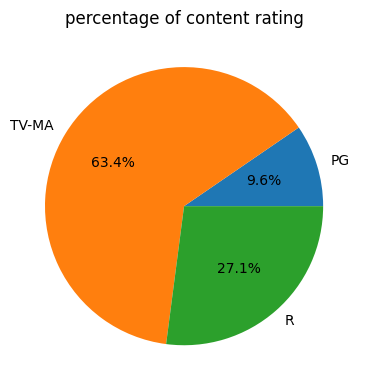

In [72]:

plt.figure(figsize=(6,4))
plt.pie(rating_cnt,labels=rating_cnt.index,autopct='%1.1f%%')

plt.title("percentage of content rating")
plt.tight_layout()
plt.savefig("content_rating_of_(PG,R,TV_MA).png")
plt.show()

3. How has the number of releases changed          |    Line Plot       |    plt.plot()
over the years?  

In [76]:
numOfrelease=df['release_year'].value_counts()
print(numOfrelease.values)
print(numOfrelease.index)

[657 648 577 519 442 349 242 197 163 161 140 135 112 110  83  71  65  54
  50  44  40  33  32  31  30  23  22  19  19  19  17  15  15  15  14  11
  11  11  10  10   9   9   8   8   8   7   7   6   5   5   4   4   3   3
   3   3   3   2   2   2   2   2   2   1   1   1   1   1   1   1   1   1]
Index([2017, 2018, 2016, 2019, 2020, 2015, 2014, 2013, 2012, 2021, 2010, 2011,
       2009, 2008, 2006, 2007, 2005, 2004, 2003, 2002, 2001, 1997, 2000, 1999,
       1998, 1993, 1995, 1996, 1992, 1994, 1990, 1988, 1989, 1982, 1991, 1980,
       1984, 1986, 1973, 1981, 1983, 1979, 1976, 1987, 1985, 1975, 1978, 1974,
       1977, 1971, 1967, 1972, 1955, 1958, 1960, 1962, 1968, 1954, 1965, 1969,
       1956, 1964, 1970, 1961, 1963, 1959, 1966, 1945, 1946, 1942, 1947, 1944],
      dtype='int64', name='release_year')


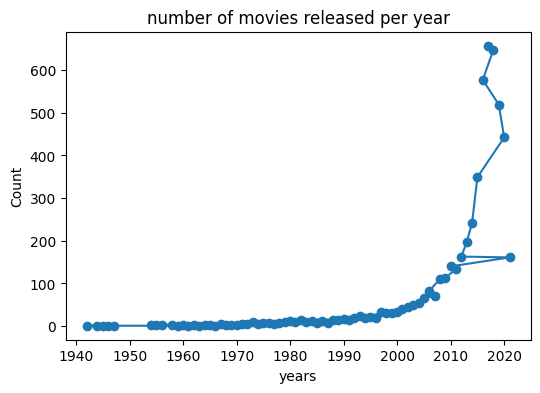

In [82]:
plt.figure(figsize=(6,4))
plt.plot(numOfrelease.index,numOfrelease.values,marker='o')
plt.title("number of movies released per year")
plt.xlabel("years")
plt.ylabel("Count")
plt.savefig("years_vs_releasedCnt.png")
plt.show()

4. What is the distribution of movie durations?    |    Histogram       |    plt.hist()

In [94]:
moviedf=df[df['type']=='Movie'].copy()
print(moviedf['duration'].info())
moviedf['duration_int']=moviedf['duration'].str.replace(' min','').astype(int)
print(moviedf['duration_int'])

<class 'pandas.core.series.Series'>
Index: 5185 entries, 7 to 8806
Series name: duration
Non-Null Count  Dtype 
--------------  ----- 
5185 non-null   object
dtypes: object(1)
memory usage: 81.0+ KB
None
7       125
9       104
12      127
24      166
27      103
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration_int, Length: 5185, dtype: int64


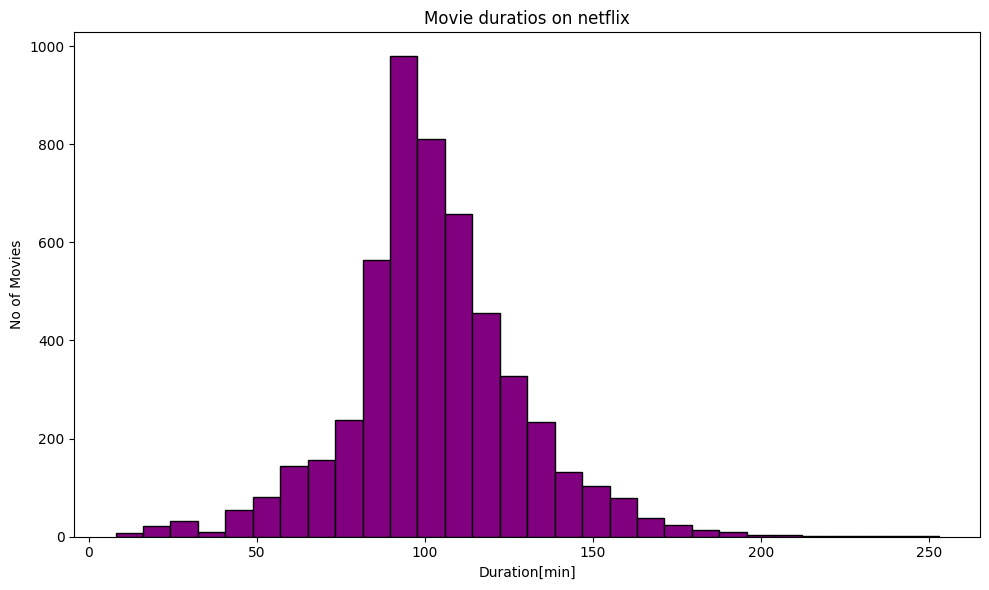

In [116]:
plt.figure(figsize=(10,6))
plt.hist(moviedf['duration_int'],bins=30,color='purple',edgecolor='black')
plt.title("Movie duratios on netflix")
plt.xlabel("Duration[min]")
plt.ylabel("No of Movies")
plt.tight_layout()
plt.savefig("dist_of_movie_dur.png")
plt.show()

5. Relationship between release year and           |    Scatter Plot    |    plt.scatter()
   number of shows?  

In [ ]:
releasedY=df['release_year'].value_counts()
print(releasedY)

[657 648 577 519 442 349 242 197 163 161 140 135 112 110  83  71  65  54
  50  44  40  33  32  31  30  23  22  19  19  19  17  15  15  15  14  11
  11  11  10  10   9   9   8   8   8   7   7   6   5   5   4   4   3   3
   3   3   3   2   2   2   2   2   2   1   1   1   1   1   1   1   1   1]


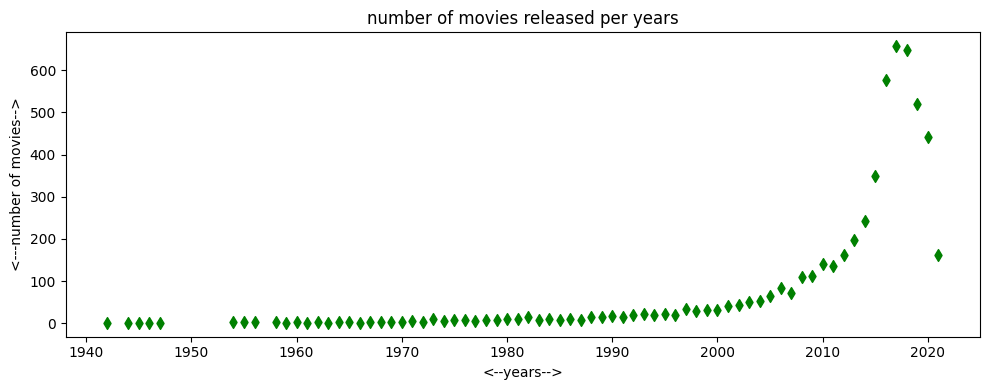

In [119]:
plt.figure(figsize=(10,4))
plt.scatter(releasedY.index,releasedY.values,marker='d',color='green')
plt.title("number of movies released per years")
plt.xlabel("<--years-->")
plt.ylabel("<---number of movies-->")
plt.tight_layout()
plt.savefig("movieScatter.png")
plt.show()


6. Top 10 countries with the highest number of     |    Bar Chart       |    plt.barh()
   shows?                                          

In [120]:
df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [128]:
countries=df['country'].value_counts().head(10)
print(countries)


country
United States     1846
India              875
United Kingdom     183
Canada             107
Spain               91
Egypt               90
Nigeria             88
Japan               83
Turkey              79
Indonesia           76
Name: count, dtype: int64


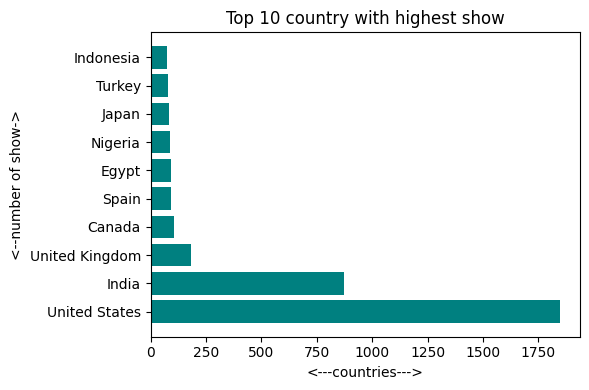

In [131]:
plt.figure(figsize=(6,4))
plt.barh(countries.index,countries.values,color='teal')
plt.title("Top 10 country with highest show")
plt.xlabel("<---countries--->")
plt.ylabel("<--number of show->")
plt.tight_layout()
plt.savefig("top_10.png")
plt.show()

7. Compare multiple plots together (e.g.,          |    Subplots        |    plt.subplot() 
   Movies vs TV Shows by Year)                     |                    |    plt.subplots() 

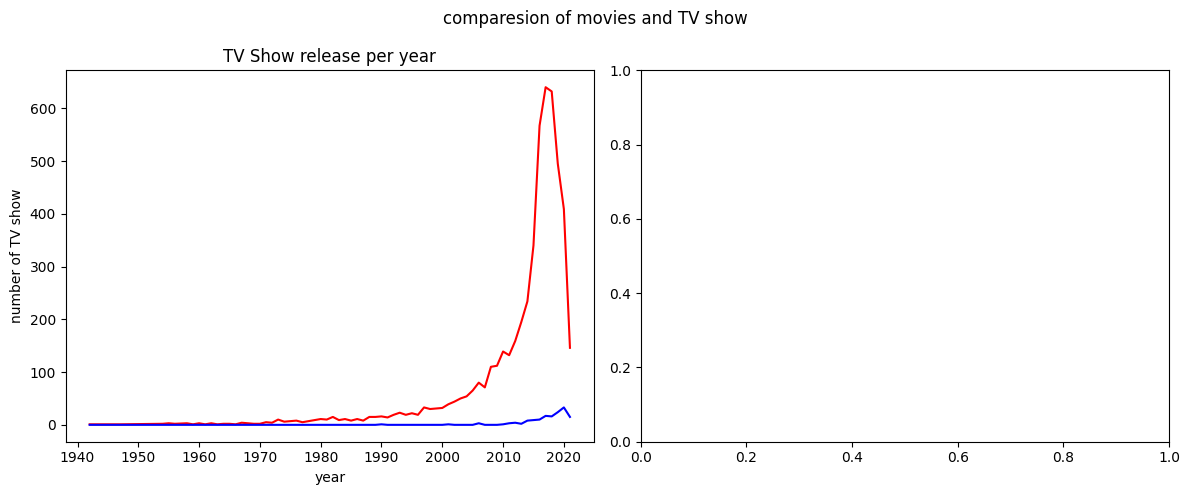

In [133]:
content_by_year=df.groupby(['release_year','type']).size().unstack().fillna(0)

fig,ax=plt.subplots(1,2,figsize=(12,5))

#first subplot :movies
ax[0].plot(content_by_year['Movie'],color='red')
ax[0].set_title("Movies release per year")
ax[0].set_xlabel("year")
ax[0].set_ylabel("number of mvoies")

#seond subplot :Tv show
ax[0].plot(content_by_year['TV Show'],color='blue')
ax[0].set_title("TV Show release per year")
ax[0].set_xlabel("year")
ax[0].set_ylabel("number of TV show")

fig.suptitle("comparesion of movies and TV show")
plt.tight_layout()
plt.savefig("moviesvs_Tv_by_year")
plt.show()

